In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

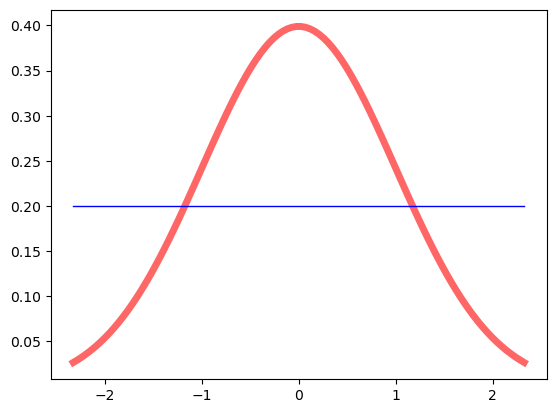

In [4]:

fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

In [7]:
from xml.etree.ElementTree import parse, dump
# Parse the E.Coli proteome XML Document
tree = parse('/data/home/jdutel/tp-proteomics/data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # MANDATORY PREFIX FOR ANY SEARCH within document
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
dump(proteins[0])

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="1989-10-01" modified="2020-08-12" version="166">
<ns0:accession>P11446</ns0:accession>
<ns0:accession>Q2M8Q3</ns0:accession>
<ns0:name>ARGC_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName evidence="1 4">N-acetyl-gamma-glutamyl-phosphate reductase</ns0:fullName>
<ns0:shortName evidence="1 4">AGPR</ns0:shortName>
<ns0:ecNumber evidence="1 2">1.2.1.38</ns0:ecNumber>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName evidence="1 3">N-acetyl-glutamate semialdehyde dehydrogenase</ns0:fullName>
<ns0:shortName evidence="1 3">NAGSA dehydrogenase</ns0:shortName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary" evidence="1">argC</ns0:name>
<ns0:name type="ordered locus">b3958</ns0:name>
<ns0:name type="ordered locus">JW3930</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference type="NCBI Taxonomy" 

In [8]:
# Find the xml subtree of a protein with accession "P31224"
for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text == "P31224":
            dump(entry)
            break

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="1993-07-01" modified="2020-08-12" version="187">
<ns0:accession>P31224</ns0:accession>
<ns0:accession>Q2MBW5</ns0:accession>
<ns0:name>ACRB_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName>Multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName>AcrAB-TolC multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:alternativeName>
<ns0:alternativeName>
<ns0:fullName>Acridine resistance protein B</ns0:fullName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary">acrB</ns0:name>
<ns0:name type="synonym">acrE</ns0:name>
<ns0:name type="ordered locus">b0462</ns0:name>
<ns0:name type="ordered locus">JW0451</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference type="NCBI Taxonomy" id="83333" />
<ns0:lineage>
<ns0:taxon>Bacteria</ns0:taxon>
<ns0:taxon>Proteo

In [45]:
import pandas as pd
df = pd.read_csv("/data/home/jdutel/tp-proteomics/data/TCL_wt1.tsv", sep = "\t", na_values = '#VALEUR!')
df = df.dropna()
print(df)



     Accession                                        Description Gene Symbol  \
0       P75936  Basal-body rod modification protein FlgD OS=Es...        flgD   
1       P76231  Uncharacterized protein YeaC OS=Escherichia co...        yeaC   
2       P0A8S9  Flagellar transcriptional regulator FlhD OS=Es...        flhD   
4       P05706  PTS system glucitol/sorbitol-specific EIIA com...        srlB   
5       P29744  Flagellar hook-associated protein 3 OS=Escheri...        flgL   
...        ...                                                ...         ...   
2011    P77330  Prophage lipoprotein Bor homolog OS=Escherichi...        borD   
2016    P02930  Outer membrane protein TolC OS=Escherichia col...        tolC   
2020    P0A917  Outer membrane protein X OS=Escherichia coli (...        ompX   
2021    P02931  Outer membrane protein F OS=Escherichia coli (...        ompF   
2022    P0AB40  Multiple stress resistance protein BhsA OS=Esc...        bhsA   

      Corrected Abundance r

In [46]:
df = df.dropna()

In [18]:
df

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075816993,-3.721334942,0.000055,4.260067469
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810458,-3.429568818,0.000351,3.45462743
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614379,-3.284695189,0.000027,4.571899347
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108496732,-3.204276506,0.019963,1.699767669
5,P29744,Flagellar hook-associated protein 3 OS=Escheri...,flgL,0.124183007,-3.009460329,0.036746,1.434786589
...,...,...,...,...,...,...,...
2011,P77330,Prophage lipoprotein Bor homolog OS=Escherichi...,borD,1.535947712,0.619129104,0.310725,0.507623276
2016,P02930,Outer membrane protein TolC OS=Escherichia col...,tolC,1.552287582,0.634395861,0.013373,1.873756665
2020,P0A917,Outer membrane protein X OS=Escherichia coli (...,ompX,1.579738562,0.65968582,0.002226,2.652390664
2021,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,1.754901961,0.811390435,0.000068,4.16495627


In [49]:
import numpy as np
abd = df['Log2 Corrected Abundance Ratio'].tolist()
mu, sigma = np.mean(abd), np.std(abd)

NameError: name 'norm' is not defined

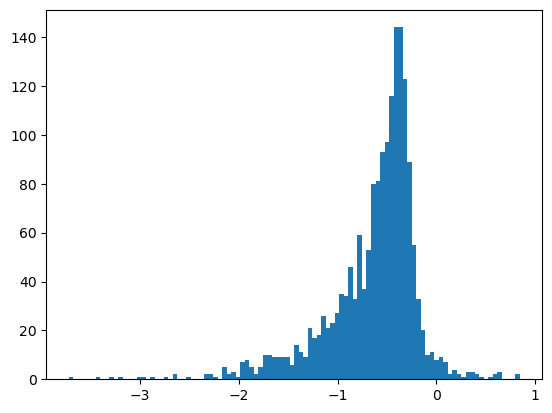

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
hist = ax.hist(abd, bins=100) # draw histogram
x = np.linspace(min(abd), max(abd), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(abd)*dx # scale accordingly
ax.plot(x, norm.pdf(x, mu, sigma)*scale) # compute theoritical PDF and draw it

In [72]:
abd = df['Log2 Corrected Abundance Ratio'].tolist()
p = df['-LOG10 Adj.P-val'].tolist()

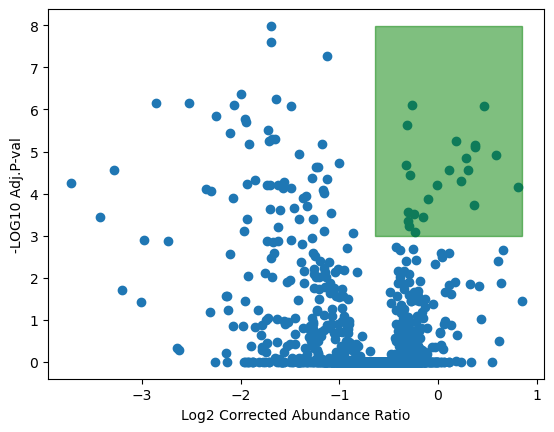

In [74]:
from matplotlib.patches import Rectangle 
x_lim, y_lim = mu, 3
fig3, ax3 = plt.subplots()
ax3.set_xlabel('Log2 Corrected Abundance Ratio')
ax3.set_ylabel('-LOG10 Adj.P-val')
_ = ax3.scatter(abd, p)
w, h = max(abd) - x_lim , max(p) - y_lim
_ = ax3.add_patch( Rectangle ( (x_lim, y_lim), w, h, alpha=0.5, color='g') ) 